### DATA CLEANING AND PREPROCESSING

In [1]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#loading the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [3]:
#merging datasets
merged_df = movies.merge(ratings, on='movieId', how='left').merge(tags, on=['movieId', 'userId'], how='left',
    suffixes=('_rating', '_tag')).merge(links,on='movieId',how='left')


In [4]:
merged_df.head()

,movieId,title,genres,userId,rating,timestamp_rating,tag,timestamp_tag,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,NaN,NaN,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,NaN,NaN,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09,NaN,NaN,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09,NaN,NaN,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09,NaN,NaN,114709,862.0


In [5]:
#checking the nature of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102695 entries, 0 to 102694
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           102695 non-null  int64  
 1   title             102695 non-null  object 
 2   genres            102695 non-null  object 
 3   userId            102677 non-null  float64
 4   rating            102677 non-null  float64
 5   timestamp_rating  102677 non-null  float64
 6   tag               3476 non-null    object 
 7   timestamp_tag     3476 non-null    float64
 8   imdbId            102695 non-null  int64  
 9   tmdbId            102682 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 7.8+ MB


In [6]:
#summary statistics
merged_df.describe()


,movieId,userId,rating,timestamp_rating,timestamp_tag,imdbId,tmdbId
count,102695.000000,102677.000000,102677.000000,1.026770e+05,3.476000e+03,1.026950e+05,102682.000000
mean,19742.419125,327.761933,3.514813,1.209495e+09,1.323525e+09,3.564670e+05,20477.542257
std,35882.264342,183.211289,1.043133,2.170117e+08,1.731554e+08,6.295366e+05,54093.268790
min,1.000000,1.000000,0.500000,8.281246e+08,1.137179e+09,4.170000e+02,2.000000
25%,1199.000000,177.000000,3.000000,1.019138e+09,1.138032e+09,9.970300e+04,710.000000
50%,3005.000000,328.000000,3.500000,1.186590e+09,1.279956e+09,1.188420e+05,6951.000000
75%,8366.000000,477.000000,4.000000,1.439916e+09,1.498457e+09,3.172480e+05,11673.750000
max,193609.000000,610.000000,5.000000,1.537799e+09,1.537099e+09,8.391976e+06,525662.000000


In [7]:
#checking missing values
merged_df.isnull().sum()


movieId                 0
title                   0
genres                  0
userId                 18
rating                 18
timestamp_rating       18
tag                 99219
timestamp_tag       99219
imdbId                  0
tmdbId                 13
dtype: int64

In [8]:
merged_df['tag'].value_counts()

tag
In Netflix queue    55
atmospheric         36
funny               23
Disney              23
surreal             23
                    ..
Ghosts               1
crucifixion          1
slavery              1
gentle               1
remaster             1
Name: count, Length: 1543, dtype: int64

In [9]:
merged_df['timestamp_tag'].value_counts()

timestamp_tag
1.137271e+09    5
1.138307e+09    5
1.137203e+09    4
1.137207e+09    4
1.137202e+09    4
               ..
1.137375e+09    1
1.138032e+09    1
1.138032e+09    1
1.457902e+09    1
1.537099e+09    1
Name: count, Length: 3219, dtype: int64

In [10]:
#replacing missing value for 'timestamp_tag'and'tag'
merged_df['timestamp_tag'].fillna(merged_df['timestamp_tag'].mean(), inplace=True)
merged_df['tag'].fillna('unknown', inplace=True)


In [11]:
#dropping missing values'userId','userId','rating','timestamp_rating'and'tmdbId'
merged_df.dropna(subset= ['userId','userId','rating','timestamp_rating','tmdbId'],inplace=True)

In [12]:
#checking there any left missing values
merged_df.isnull().sum()


movieId             0
title               0
genres              0
userId              0
rating              0
timestamp_rating    0
tag                 0
timestamp_tag       0
imdbId              0
tmdbId              0
dtype: int64

In [13]:
#checking duplicates
merged_df.duplicated().sum()

0

### Preprocessing

 Univariate Analysis

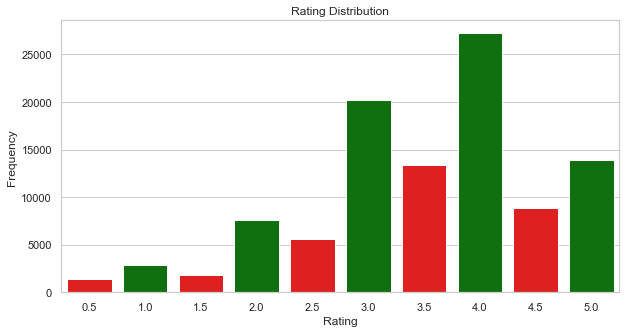

In [14]:
#Rating Distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_df['rating'], palette=['red','green'])
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.show()


Bivariate Analysis

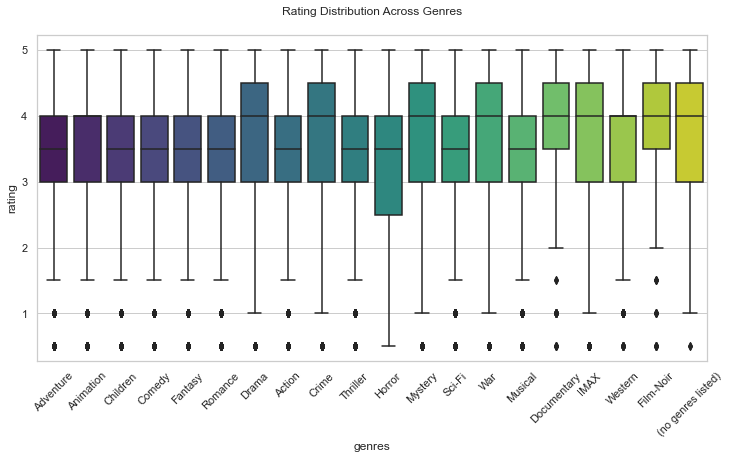

In [15]:
# Rating Distribution by Genre 
merged_df_exploded = merged_df.assign(genres=merged_df['genres'].str.split('|')).explode('genres')

plt.figure(figsize=(12,6))
sns.boxplot(x='genres', y='rating', data=merged_df_exploded, palette='viridis')
plt.title('Rating Distribution Across Genres', pad=20)
plt.xticks(rotation=45)
plt.show()

##### ENCODING

In [16]:
merged_df = pd.get_dummies(merged_df, columns=['genres'], drop_first=True)

In [17]:
merged_df.head()

,movieId,title,userId,rating,timestamp_rating,tag,timestamp_tag,imdbId,tmdbId,genres_Action,...,genres_Romance|Thriller,genres_Romance|War,genres_Romance|Western,genres_Sci-Fi,genres_Sci-Fi|IMAX,genres_Sci-Fi|Thriller,genres_Sci-Fi|Thriller|IMAX,genres_Thriller,genres_War,genres_Western
0,1,Toy Story (1995),1.0,4.0,9.649827e+08,unknown,1.323525e+09,114709,862.0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Toy Story (1995),5.0,4.0,8.474350e+08,unknown,1.323525e+09,114709,862.0,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Toy Story (1995),7.0,4.5,1.106636e+09,unknown,1.323525e+09,114709,862.0,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Toy Story (1995),15.0,2.5,1.510578e+09,unknown,1.323525e+09,114709,862.0,False,...,False,False,False,False,False,False,False,False,False,False
4,1,Toy Story (1995),17.0,4.5,1.305696e+09,unknown,1.323525e+09,114709,862.0,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
for col in merged_df.select_dtypes(include='bool'):
    merged_df[col] = merged_df[col].astype(int)
merged_df.head()

,movieId,title,userId,rating,timestamp_rating,tag,timestamp_tag,imdbId,tmdbId,genres_Action,...,genres_Romance|Thriller,genres_Romance|War,genres_Romance|Western,genres_Sci-Fi,genres_Sci-Fi|IMAX,genres_Sci-Fi|Thriller,genres_Sci-Fi|Thriller|IMAX,genres_Thriller,genres_War,genres_Western
0,1,Toy Story (1995),1.0,4.0,9.649827e+08,unknown,1.323525e+09,114709,862.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),5.0,4.0,8.474350e+08,unknown,1.323525e+09,114709,862.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),7.0,4.5,1.106636e+09,unknown,1.323525e+09,114709,862.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),15.0,2.5,1.510578e+09,unknown,1.323525e+09,114709,862.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),17.0,4.5,1.305696e+09,unknown,1.323525e+09,114709,862.0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Defining features (X) and target (y)
X = merged_df.drop(columns=['rating'])
y = merged_df['rating']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling

In [20]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test = scaler.transform(X_test.select_dtypes(include=['number']))

In [ ]:
merged_df.to_csv('cleaned_merged_data.csv', index=False)